# Parcours de graphe - ENORA TRELOHAN ET ALEXANDRE ECALLE

L'objectif de ce projet est d'étudier des algorithmes de calcul de plus court chemin.

Ce projet est :

*   À faire par groupe de 4 maximum
*   À rendre sous forme de notebook Jupyter sur Moodle au plus tard le vendredi 12 avril à 23h59.

Ce sujet a été testé sur la machine virtuelle "ULR Ubuntu 20.04". Il devrait aussi fonctionner sur les installations Linux récentes, et sur Google Collab.

In [34]:
# Installation des dépendances

!pip install partition-networkx
!pip install matplotlib
!pip install networkx
!pip install numpy


import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
def mydraw(G, edges):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color="grey")
    nx.draw_networkx_edges(G, pos, edge_color="red")
    nx.draw_networkx_edges(G, pos, edgelist=edges, width=6, alpha=0.5, edge_color="orange")
    nx.draw_networkx_labels(G, pos)
    plt.show()

## Échauffement

Le code ci dessous permet de générer un graphe $G$. Vous utiliserez ce graphe pour tout le reste du projet.

In [36]:
G = nx.gnp_random_graph(200, 0.6)

sommet1 = 10
sommet2 = 20

### Implémentation de l'algorithme de Dijkstra

L'algorithme de Dijkstra est un algorithme de calcul de plus court chemin dans un graphe, propose par Edsger Dijkstra en 1959.

Je vous propose de commencer par implémenter cet algorithme. Vous avez normalement vu cet algorithme en CM et en TD. Si vous en avez besoin, vous pouvez aussi consulter la [page Wikipédia](https://fr.wikipedia.org/wiki/Algorithme_de_Dijkstra), ou même la [publication originale](https://d1wqtxts1xzle7.cloudfront.net/82011040/9256D-libre.pdf?1646987426=&response-content-disposition=inline%3B+filename%3DA_Note_on_Two_Problems_in_Connexion_with.pdf&Expires=1709315850&Signature=dcrazHFOoCjPooxh~~A8wHovENpsna4Moa2NqtpKl-eyfSW~buuvxBC0vuD6TyKEdViPTsnNg9ii1kQJt65WKHto3cWvoElwa8u8AjRHgAu7L~GVU~eeRCKL~vb1nQzWeOaMseIv27eWndKIvTnipqWqJ2QDueuwA8Ii9m6HOovxXqZPSVL1bsI~ok9uLfQ0R9-MHPeC8Xd5okdJUtgOTVrn1hrQZBRcRxyG-Aq1kxwO4iOM3yNiD-UKe4JFUq1d~FyFzo00G9zgaS0LfR-h0YBA4EYk89Vkfv6ZCdgWgq8ndaZjo~yuK7Azf2JZYWUkO-bGEN~mYSikOxTdBWvzyQ__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA). Votre implémentation retournera un plus court chemin de la forme `[source, sommet_1, sommet_2, ..., target]`.

In [37]:
def initDijkstra(G, sdeb):
    d = {}
    pred = {}
    for s in G.nodes():
        d[s] = float('inf')  # Initialisation des distances à l'infini
        pred[s] = None  # Initialisation des prédécesseurs à None
    d[sdeb] = 0  # La distance du sommet de départ à lui-même est nulle
    return d, pred

def findMin(Q, d):
    min_distance = float('inf')
    min_node = None
    for s in Q:
        if d[s] < min_distance:
            min_distance = d[s]
            min_node = s
    return min_node

def updateDist(G, d, pred, s1, s2):
    if d[s2] > d[s1] + 1:  # Toutes les arêtes ont un poids de 1
        d[s2] = d[s1] + 1
        pred[s2] = s1

def dijkstra(G, sdeb, sfin):
    d, pred = initDijkstra(G, sdeb)
    Q = set(G.nodes())  # Ensemble de tous les nœuds
    while Q:  # Tant que Q n'est pas vide
        s1 = findMin(Q, d)  # Trouver le nœud de distance minimale
        if s1 == sfin:  # Si on atteint le nœud de fin, on arrête
            break
        Q.remove(s1)  # Retirer s1 de l'ensemble Q
        for s2 in G.neighbors(s1):  # Pour chaque nœud voisin de s1
            updateDist(G, d, pred, s1, s2)  # Mettre à jour les distances
    # Reconstruction du chemin le plus court
    path = []
    s = sfin
    while s != sdeb:
        path.insert(0, s)
        s = pred[s]
    path.insert(0, sdeb)
    return path




Vérifiez vos résultats en les comparant au plus court chemin fourni par [l'implémentation de l'algorithme de Dijkstra par la librairie Networkx](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.weighted.dijkstra_path.html) à l'aide du code ci-dessous.

Ne touchez pas au code ci-dessous, je m'en servirai pour noter vos travaux.

In [38]:
path1 = nx.dijkstra_path(G, sommet1, sommet2)
print(path1)
path2 = dijkstra(G, sommet1, sommet2)
print(path2)
print(path1 == path2)

[10, 3, 20]
[10, 3, 20]
True


L'inconvévient de l'algorithme de Dijkstra est qu'il explore une grande partie du graphe avant de trouver le plus court chemin. C'est à dire qu'en partant d'un sommet source, il va passer en revue beaucoup de sommets avant de trouver le sommet destination. D'autres algorithmes, comme l'[algorithme A*](https://fr.wikipedia.org/wiki/Algorithme_A*) proposent des optimisations permettant d'explorer moins de sommets, et donc de trouver un plus court chemin plus rapidement.

### Étude du temps d'exécution
Affichez maintenant le temps d'exécution de votre implémentation de Dijkstra en fonction de la taille d'un graphe $H$ (en nombre de sommets).

Vous pouvez générer de nouveaux graphes pour cette question uniquement. Dans le reste de votre projet, vous devez utiliser le graphe $G$ généré au début de ce document.

Vous pouvez utiliser la librairie time et/ou datetime pour mesurer des temps d'exécution.

Vous pouvez utiliser la librairie matplotlib pour afficher vos résultats. J'ai utilisé plt.plot() pour la figure ci-dessous.

J'ai volontairement laissé la figure que j'obtiens avec mon code pour vous donner une idée du résultat attendu.


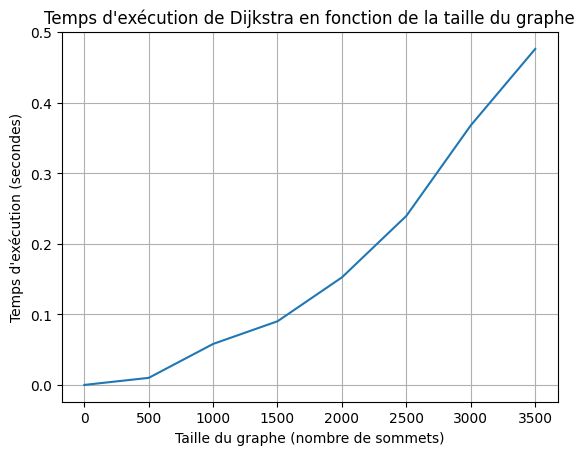

In [39]:

import time

def measure_execution_time(G, sdeb, sfin):
    start_time = time.time()
    shortest_path = dijkstra(G, sdeb, sfin)
    end_time = time.time()
    execution_time = end_time - start_time
    return execution_time


graph_sizes = list(range(1, 4001, 500))


execution_times = []


for size in graph_sizes:
    G = nx.gnp_random_graph(size, 0.6)
    sdeb = 0  # Nous choisissons un sommet de départ arbitraire
    sfin = size - 1  # Nous choisissons un sommet de fin arbitraire
    execution_time = measure_execution_time(G, sdeb, sfin)
    execution_times.append(execution_time)
   

plt.plot(graph_sizes, execution_times)
plt.title("Temps d'exécution de Dijkstra en fonction de la taille du graphe")
plt.xlabel("Taille du graphe (nombre de sommets)")
plt.ylabel("Temps d'exécution (secondes)")
plt.grid(True)
plt.show()




Affichez maintenant le temps d'exécution de votre implémentation de Dijkstra en fonction du nombre de plus court chemins demandés (donc en fonction du nombre d'exécutions de Dijkstra), pour le graphe $G$ (généré lors de l'échauffement).

In [50]:

def measure_dijkstra_execution_time(G, sdeb, sfin, num_executions):
    total_time = 0
    for _ in range(num_executions):
        start_time = time.time()
        shortest_path = dijkstra(G, sdeb, sfin)
        end_time = time.time()
        total_time += end_time - start_time
    return total_time

G = nx.gnp_random_graph(200, 0.6)
sommet1 = 10
sommet2 = 20


num_executions_values = [1, 10, 100, 1000, 10000]
your_cumulative_times = []
networkx_cumulative_times = []

for num_executions in num_executions_values:
    execution_time = measure_dijkstra_execution_time(G, sommet1, sommet2, num_executions)
    if your_cumulative_times:
        previous_cumulative_time = your_cumulative_times[-1]
        your_cumulative_times.append(previous_cumulative_time + execution_time)
    else:
        your_cumulative_times.append(execution_time)

        




plt.plot(num_executions_values, your_cumulative_times)
plt.title("Temps d'exécution cumulatif de Dijkstra en fonction du nombre d'exécutions")
plt.xlabel("Nombre d'exécutions")
plt.ylabel("Temps d'exécution cumulatif (secondes)")
plt.legend()
plt.grid(True)
plt.show()


KeyboardInterrupt: 

Sans surprise, le temps d'exécution augmente de manière linéaire par rapport au nombre d'exécution de Dijkstra demandé : deux exécutions de Dijkstra prennent environ deux fois plus de temps qu'une seule exécution. Ceci n'est pas vrai pour tous les algorithmes. Certaines approches réalisent une étape de précalcul, qui permet d'économiser du temps lors des futurs exécutions.

## Algorithme d'Akiba

Nous allons maintenant étudier l'[algorithme d'Akiba](https://arxiv.org/pdf/1304.4661.pdf), qui est un algorithme de calcul de distance (longueur d'un plus court chemin) dans des graphes, proposé en 2013 par Akiba *et al*. Cet algorithme réalise d'abord une étape de précalcul, pendant laquelle il ajoute des étiquettes (*labels*) sur les sommets du graphe. Ces étiquettes permettent ensuite de répondre rapidement à des requêtes demandant d'identifier la distance entre deux sommets.

Plus précisément, cet algorithme :

* Calcule pour chaque sommet $u$ de $G$, des étiquettes (pas toutes) de la forme ($v_i$, δ$(u, v_i)$), où δ$(u, v_i)$ représente la distance entre u et $v_i$ dans $G$.
* L'ensemble d'étiquettes $L$ est calculé en faisant un parcours en largeur partiel, depuis chaque sommet $u$ de $G$.
* Une fois $L$ calculé, la distance entre deux sommets $u$ et $v$ est calculée en faisant `requete(u, v, L)`. Cette fonction consiste simplement à trouver un sommet $z$ tel que :
  * ($z$, δ$(u, z)$) et ($z$, δ$(v, z)$) existent, c'est à dire que $z$ est dans les étiquettes de $u$ et de $v$
  * $z$ minimise δ$(u, z)$ + δ$(v, z)$, c'est à dire la distance en $u$ et $z$ puis la distance entre $z$ et $v$.

L'algorithme d'Akiba ne calcule pas toutes les étiquettes de chacun des sommets, ce serait très couteux en temps et en mémoire. L'algorithme effectue des parcours en largeur partiels, comme suit :

* Initialement, l'ensemble d'étiquettes $L_0$ est vide. L'ensemble d'étiquettes $L_k$ est généré lors du $k$ ième parcours en largeur. Lors du $k+1$ ième parcours en largeur, effectué depuis un sommet $u$, l'algorithme ne parcours pas les voisins d'un sommet $v$ (donc dans l'arbre généré par ce parcours, $v$ sera une feuille) quand `requete(u, v, L_k)` est inférieur ou égal à la distance mesurée lors du $k+1$ ième parcours. Autrement dit, on ne parcours pas au dela du sommet $v$, quand on sait déjà qu'il existe un chemin plus court reliant $u$ à $v$.

Pour plus de détails, je vous invite à consulter [la publication originale](https://arxiv.org/pdf/1304.4661.pdf) (vous pouvez bien sûr aussi me poser des questions).

### Parcours en largeur

Commencez par implémenter un parcours en largeur complet d'un graphe $G$, sans l'optimisation mentionée ci-dessus. `BFS(G, u)` doit retourner un dictionnaire $L$ tel que `L[v]` est égal à la distance entre le sommet $u$ et le sommet $v$ dans le graphe $G$, pour tous les sommets $v$ du graphe $G$.

In [41]:
import queue

def BFS(G, u):
    L = {u : 0}
    q = queue.Queue()
    visited = {u}
    q.put([u, 0])
    while not q.empty():
        [u, dist]= q.get() 
        for v in G.neighbors(u):
            if v not in visited:
                visited.add(v)
                L[v] = dist + 1
                q.put([v, L[v]])
    return L

### Pour avoir un support visuel, on utilise une version qui retourne L et les arêtes retenues
def BFSdraw(G, u):
    L = {u : 0}
    q = queue.Queue()
    visited = {u}
    edges = []
    q.put([u, 0])
    while not q.empty():
        [u, dist]= q.get()
        for v in G.neighbors(u):
            if v not in visited:
                visited.add(v)
                edges.append((u, v))
                L[v] = dist + 1
                q.put([v, L[v]])
    return L, edges

In [42]:
#L, edges = BFSdraw(G,0) 
#mydraw(G, edges)
L = BFS(G, 0) 
# nx.draw(G, with_labels=True)
print(L)

{0: 0, 1: 1, 2: 1, 4: 1, 6: 1, 7: 1, 9: 1, 13: 1, 14: 1, 15: 1, 16: 1, 18: 1, 19: 1, 21: 1, 23: 1, 24: 1, 27: 1, 30: 1, 31: 1, 32: 1, 33: 1, 35: 1, 36: 1, 38: 1, 39: 1, 41: 1, 45: 1, 48: 1, 49: 1, 51: 1, 52: 1, 54: 1, 55: 1, 56: 1, 58: 1, 60: 1, 62: 1, 64: 1, 65: 1, 66: 1, 69: 1, 70: 1, 71: 1, 73: 1, 75: 1, 82: 1, 84: 1, 85: 1, 87: 1, 90: 1, 95: 1, 96: 1, 99: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 109: 1, 110: 1, 112: 1, 113: 1, 114: 1, 118: 1, 119: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 130: 1, 131: 1, 132: 1, 133: 1, 134: 1, 135: 1, 138: 1, 140: 1, 141: 1, 142: 1, 146: 1, 149: 1, 151: 1, 152: 1, 154: 1, 155: 1, 158: 1, 159: 1, 165: 1, 166: 1, 169: 1, 171: 1, 172: 1, 174: 1, 176: 1, 177: 1, 178: 1, 179: 1, 180: 1, 181: 1, 183: 1, 184: 1, 186: 1, 187: 1, 188: 1, 189: 1, 190: 1, 191: 1, 192: 1, 193: 1, 194: 1, 199: 1, 200: 1, 201: 1, 205: 1, 207: 1, 208: 1, 209: 1, 211: 1, 212: 1, 213: 1, 214: 1, 217: 1, 220: 1, 223: 1, 224: 1, 225: 1, 226: 1, 227: 1, 229: 1, 231

### Approche naïve

Effectuez un parcours en largeur depuis chaque sommet $u$ de $G$, puis remplissez l'ensemble d'étiquettes $L$. `L[u][v]` est égal à la distance entre $u$ et $v$ dans $G$. Retournez $L$.

In [43]:
def naive(G):
    L = {}
    for u in G.nodes:
        L[u] = BFS(G, u)
    return L

**Question :** Quelle est la complexité de `naive(G)` ? Donnez simplement l'ordre de grandeur (par exemple $O(n)$), ainsi qu'une justification en quelques lignes, pas besoin de fournir de coefficients ni de constantes.

**Réponse :**  La complexité de `naive(G)` est de $O(n^2 + nm)$, avec $n$ le nombre de sommets et $m$ le nombre d'arêtes. L'ordre de grandeur varie selon la densité du graphe : $O(n^2)$ pour les graphes peu denses ($m$ est de l'ordre de $n$) et $O(nm)$ pour les graphes denses ($n$ est de l'ordre de $m^2$, soit $O(m^3)$). L'algorithme faisant un parcours en largeur complet, il visite toutes les arêtes connectées à chaque sommet. Plus ces derniers ont d'arêtes, plus la méthode `naive(G)`sera coûteuse en temps de calcul.


### Requête

Implémentez une méthode `requete(u, v, L)` permettant de récupérer la distance entre $u$ et $v$ dans $G$ depuis $L$. Pour ce faire, à partir de `L[u]` et `L[v]`, vous devez trouver le sommet $z$ qui minimise la distance `L[u][z] + L[v][z]`. Retournez cette distance.

In [44]:
def requete(u, v, L):
    distance = float('inf')
    for z in L[u].keys() & L[v].keys():
            dist_temp = L[u][z] + L[v][z]
            if dist_temp < distance:
                distance = dist_temp
    return distance

### Akiba

Vous allez maintenant implémenter l'algorithme d'Akiba. Cet algorithme est similaire à l'approche naïve que vous avez déjà implémentée. L'idée est d'effectuer des parcours en largeur partiels, de manière à éviter de renseigner deux fois la même information dans l'ensemble d'étiquettes $L$, comme expliqué ci-dessus.

Commencez par implémenter la méthode `pruned_BFS(G, u, L)`, qui va effectuer un parcours en largeur partiel depuis le sommet $u$ dans le graphe $G$. Au moment où le parcours considère le sommet $v$, vous ne devez pas explorer les voisins de $v$ si `requete(u, v, L)` est inférieur ou égal à la distance entre $u$ et $v$ mesurée lors de ce parcours. Sinon, vous devez rajouter l'étiquette `L[u][v]` (donc la distance entre $u$ et $v$) à $L$, comme expliqué dans [la publication originale](https://arxiv.org/pdf/1304.4661.pdf).

Retournez l'ensemble d'étiquette $L_{new}$, qui est l'ensemble d'étiquettes $L$, auquel vous aurez rajouté les étiquettes du parcours en largeur partiel depuis $u$.

In [45]:
def pruned_BFS(G, u, L):
    L_new = L.copy()
    P = {v: float('inf') for v in G.nodes()}
    P[u] = 0 # Point de départ = distance 0
    q = queue.Queue()
    q.put(u)
    while not q.empty():
        v = q.get()
        if requete(u, v, L) <= P[v]: # Si la distance entre u et v dans L est plus petite que la distance actuelle
            continue
        L_new[v] = L[v] | {u : P[v]} # Mise à jour de la distance entre u et v
        for w in G.neighbors(v): 
            if P[w] == float('inf'):
                P[w] = P[v] + 1 # Mise à jour de la distance entre u et w
                q.put(w)         
    return L_new

Vous pouvez maintenant effectuer un `pruned_BFS(G, u, L)` depuis tous les sommets $u$ de $G$, de manière à remplir l'ensemble d'étiquettes $L$.

In [46]:
def akiba(G):
    L = {u: {} for u in G.nodes()}
    for u in G.nodes():
        L = pruned_BFS(G, u, L)
    return L

Votre implémentation de l'algorithme d'Akiba devrait maintenant être fonctionnelle. Vous pouvez vérifier son bon fonctionnement en comparant son résultat avec le résultat de la fonction [shortest_path_length](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path_length.html) de la librairie Networkx. Je vous conseille de vérifier vos résultats sur plusieurs paires de sommets car j'utiliserai une paire de sommets aléatoire, ainsi qu'un autre graphe quand je noterai vos travaux.

Ne touchez pas au code ci-dessous, je m'en servirai pour noter vos travaux.

In [49]:
distance1 = nx.shortest_path_length(G, sommet1, sommet2)
print(distance1)
L = akiba(G)
distance2 = requete(sommet1, sommet2, L)
print(distance2)
print(distance1 == distance2)

1


KeyboardInterrupt: 

Pour finir, affichez le temps d'éxecution de votre implémentation d'Akiba en fonction du nombre de requêtes (le nombre d'exécutions de `requete(u, v, L)`).

In [ ]:
#import time  # déjà importé plus haut

def exectime(n, G, sommet1, sommet2):
    n_tab = [i for i in range(1, n+1)]
    start_time = time.perf_counter()
    result = {n : 0 for n in n_tab}
    L = akiba(G)
    akiba_time = time.perf_counter() - start_time
    for n in n_tab:
        t = time.perf_counter()
        for _ in range(n):
            requete(sommet1, sommet2, L)
        result[n] = time.perf_counter() - t + akiba_time
    return result

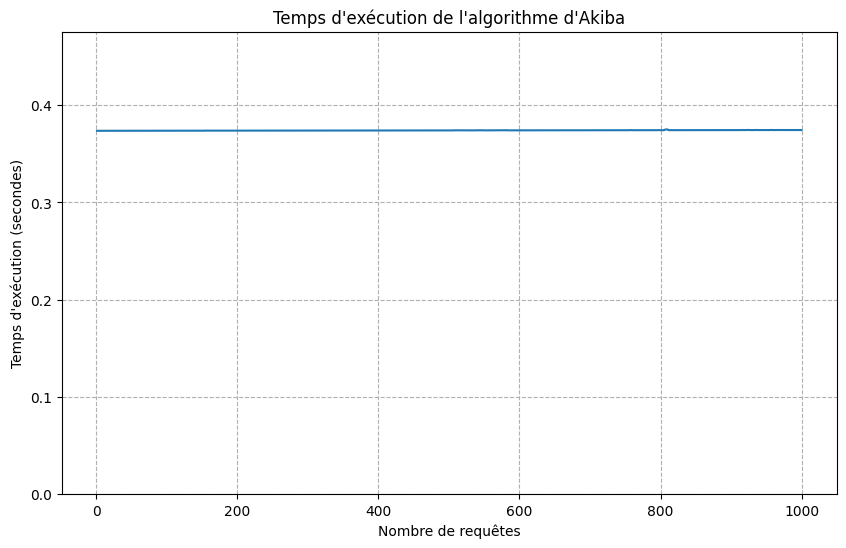

In [ ]:
n = 1000
exec_tab = exectime(n, G, sommet1, sommet2)
plt.figure(figsize=(10, 6))
plt.plot(list(exec_tab.keys()), list(exec_tab.values()))
plt.ylim(0, max(exec_tab.values()) + 0.1)
plt.xlabel("Nombre de requêtes")
plt.ylabel("Temps d'exécution (secondes)")
plt.title("Temps d'exécution de l'algorithme d'Akiba")
plt.grid(True, which="both", ls="--") 
plt.show()

L'algorithme d'Akiba prend plus de temps que Dijkstra lors de la première requête car il doit construire l'ensemble d'étiquettes. Par contre, les requêtes suivantes prennent très peu de temps. Cet algorithme est donc rentable si le nombre de requêtes est élevé.